In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

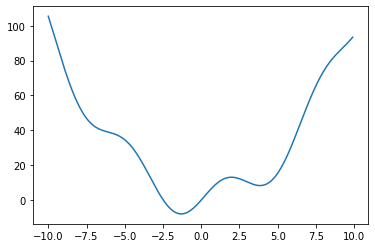

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show() # 이 함수의 최소는 -1.3 근방이고, 지역 최소는 3.8 근방이다.

In [ ]:
result = optimize.minimize(f, x0=0)
result.x #찾을 값

array([-1.30644012])

### solution 1: Bisection Method(이분법)



![Bisection](https://drive.google.com/uc?id=1HpC4mdh5Yhki4gB2iau98uTh1yFJdKNJ)

* Step 1: 초기값 a, b를 설정한다. (해를 포함하는 구간으로 설정)<br>

   Let interval = (b-a) / 2; m = a + interval

* Step 2: Convexity를 체크한다.<br>

   상단 그림은 해가 [a, b] 사이에 있는 것이고, 하단 그림은 [a, b] 사이에 해가 없는 경우이다. <br>
   만약 해가  [a, b]에 있다면, f(a), f(b) > f(m)를 만족한다. <br>
   이때는 b=m, m = (a+b)/2, interval = interval / 2 로 수정하고 반복한다.<br>
   해가 [a, b]에 없다면 움직이는 방향을 결정해야 한다.<br>
   만약, f(a) > f(m) > f(b) 이라면 오른쪽으로 움직이고 f(a) < f(m) < f(b)라면 왼쪽으로 움직인다. <br>
   오른쪽으로 움직일 때에는 a = a + interval, 왼쪽으로 움직일 때에는 a = a - interval 로 정의하고 <br>
   m = a + interval, b = m + interval 로 정의하고 반복하다.<br>
   
   interval이 너무 작아 무시할 만하면 반복을 중지하고 m을 출력한다.
   
<br> 

In [ ]:
def bisection(a, b):
    interval = (b-a) / 2
    m = a + interval

    while interval > 10e-8:
        if f(a) > f(m) and f(b) > f(m):
            b = m
            m = (a+b) / 2
            interval = interval / 2
        elif f(a) > f(m) and f(m) > f(b):
            a = a + interval
            m = a + interval
            b = m + interval
        elif f(a) < f(m) and f(m) < f(b):
            a = a - interval
            m = a - interval
            b = m - interval

    return m

In [ ]:
bisection(-10, 10) # global minimum 찾음

-1.3064400106668472

In [ ]:
bisection(2.5, 5) # local minimum 값 구하기

3.837467059493065

In [ ]:
# 교수님 풀이
def checkConvex(a, m, b):
    if (f(a) > f(m)) and (f(b)> f(m)):
        res = True
    else:
        res = False

    if f(a) > f(b):
        direction = 1
    else:
        direction = -1
    
    return (res, direction)

###  solution 2: Gradient Descent Algorithm(경사하강법)
$ x = x - \alpha \frac {\partial}{\partial x} f(x), \alpha $  is learning rate


#### 삼각함수 미분
$ \frac {d}{dx} sin x = cos x$

In [ ]:
def derivative_f(x): # 원래의 f(x)를 미분한 것
    return 2*x + 10*np.cos(x)

In [ ]:
def gradient_descent(x, a):
    while True:
        _tmp = derivative_f(x)
        if -10e-8 < _tmp < 10e-8:
            break
        else:
            x = x - (a * _tmp)
    return round(x, 4)

In [ ]:
gradient_descent(-5, 0.1) # global minimum

-1.3064

In [ ]:
gradient_descent(7, 0.1) # local minimum

3.8375

In [ ]:
# 수치미분 이용하기
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)

In [ ]:
def gradient_descent2(x, a):
    while True:
        _tmp = numerical_diff(f, x)
        if -10e-8 < _tmp < 10e-8:
            break
        else:
            x = x - (a * _tmp)
    return round(x, 4)

In [ ]:
gradient_descent2(-5, 0.1)

-1.3064

In [ ]:
gradient_descent2(7, 0.1)

3.8375